In [1]:
#1.Q: How do you handle duplicate values in a dataset in Python?

hello world


In [5]:
#1.A: use function set()
t= [1, 2, 3, 1, 2, 5, 6, 7, 8]

{1, 2, 3, 5, 6, 7, 8}

In [15]:
colors = ["red", "blue", "blue", "green"]

In [16]:
set(colors)

{'blue', 'green', 'red'}

In [19]:
import numpy as np
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2], [3, 4]])
print "a + b"
print a * b

a + b
[[ 1  4]
 [ 9 16]]


In [21]:
print np.dot(a, b)

[[ 7 10]
 [15 22]]


In [22]:
#2.Q:You are given two tables - friend_request and request_accepted. 
#Friend_request contains requester_id, time and sent_to_id
#request_accepted table contains time, acceptor_id and requestor_id. 
#How will you determine the overall acceptance rate of requests? 

#2 A: Using SQL
 count(a.acceptor_id)/ count(b.requester_id)
 from friend_request a
 left join request_accpeted b
 on a.requestor_id = b.requestor_id
 and a.sent_to_id = b.acceptor_id
 where date(a.time)< date_add(current_date(),'-7','day')

In [67]:
#using python
import pandas as pd
current_date = '5/24/2017'

In [46]:
friend_request= pd.DataFrame(
    {
        "requestor_id": ["A", "B", "C","A","D","F"],
        "time": ["5/1/2017", "5/8/2017", "5/11/2017","5/12/2017","5/22/2017","5/23/2017"],
        "sent_to_id": ["C", "A", "B","C","E","A"]
    },
    columns = ["requestor_id", "time", "sent_to_id"]
)

In [62]:
request_accepted = pd.DataFrame(
    {
        "acceptorid": ["A", "B", "C","E"],
        "time": ["5/9/2017", "5/13/2017", "5/14/2017","5/25/2017"],
        "requestor_id": ["B", "C", "A","D"]
    },
    columns = ["acceptorid", "time", "requestor_id"]
)

In [65]:
joined_table= pd.merge(friend_request,request_accepted,how = 'left',left_on=['requestor_id','sent_to_id'],right_on=['requestor_id','acceptorid'])

In [110]:
print joined_table

  requestor_id     time_x sent_to_id acceptorid     time_y    days
0            A 2017-05-01          C          C 2017-05-14 13 days
1            B 2017-05-08          A          A 2017-05-09  1 days
2            C 2017-05-11          B          B 2017-05-13  2 days
3            A 2017-05-12          C          C 2017-05-14  2 days
4            D 2017-05-22          E          E 2017-05-25  3 days
5            F 2017-05-23          A        NaN        NaT     NaT


In [111]:
joined_table['time_x'] =pd.to_datetime(joined_table['time_x'])
joined_table['time_y'] =pd.to_datetime(joined_table['time_y'])

In [125]:
joined_table['days']= joined_table.time_y-joined_table.time_x

joined_table['days']= joined_table['days'].astype('timedelta64[D]')
joined_table.head(6)

,requestor_id,time_x,sent_to_id,acceptorid,time_y,days
0,A,2017-05-01,C,C,2017-05-14,13.0
1,B,2017-05-08,A,A,2017-05-09,1.0
2,C,2017-05-11,B,B,2017-05-13,2.0
3,A,2017-05-12,C,C,2017-05-14,2.0
4,D,2017-05-22,E,E,2017-05-25,3.0
5,F,2017-05-23,A,NaN,NaT,NaN


In [132]:
filter1 = joined_table[joined_table['days']<7]

In [138]:
null = joined_table[joined_table['days'].isnull()]

In [142]:
filter_table = pd.concat([filter1,null])
print filter_table

  requestor_id     time_x sent_to_id acceptorid     time_y  days
1            B 2017-05-08          A          A 2017-05-09   1.0
2            C 2017-05-11          B          B 2017-05-13   2.0
3            A 2017-05-12          C          C 2017-05-14   2.0
4            D 2017-05-22          E          E 2017-05-25   3.0
5            F 2017-05-23          A        NaN        NaT   NaN


In [155]:
acceptance_count = filter_table["acceptorid"].count()
request_count = float(filter_table["requestor_id"].count())
print acceptance_count
print request_count
acceptance_rate = float(acceptance_count / request_count)
print acceptance_rate

4
5.0
0.8


#3 Q: Do some research and summarize the business model of your dream company, 
or company that you interview with.
What is the product
Who are the customer
How do they make money
Why do you want to work for this company?
(Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?


#3 A: LinkedIn is a business- and employment-oriented social networking service that operates via websites and mobile apps.
-What is the product  
1.Premium subscriptions- no limited features like, inmail credits, no limition to "filtered search" options, "you may also know" credits or "3rd level contact" information views or "who viewed your profiles"
2.recruiter solutions - positing jobs/finding candidates
3.corporate solutions - advertising solutions: boost/sponsored post(with a follow buttion),contextual ads/top menu bar ads
4.learning solution - slideshare and lynda learning courses and content
5.publishing platform - pulse

-Who are the customer
LinkedIn has 3 customer segments. 
1.The most obvious one are all the internet users who go to the site and create a profile on it. 
2.there are the recruiters who are looking for talent, 
3.advertisers who are looking to reach either a wealthy B2C audience or senior B2B decision makers.

-How do they make money 
1.premium subscriptions 
2.marketing solutsion
3.talent solutions (hiring and learning and development)


-Why do you want to work for this company? 
It is the largest professinoal social networking which brings the need for any professionals to connect with and contains tremendous interesting data to study. I am data-driven person and love to work for it to see what is behind the scenes.


In [156]:
import scipy

In [159]:
#4 PrintCumulativetimeserios
#read data
file_location = "/Users/halopanda/Documents/BA/Course/Week 4 Python/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [204]:
np.unique(my_data["experiment_id"])
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]

In [221]:
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
blue_button_data = my_data[['date','spend_usd']][my_data.experiment_id == blue_button]

In [222]:
red_ts = red_button_data.groupby('date')['spend_usd'].sum()

red_ts_cum= red_ts.cumsum()
blue_ts = blue_button_data.groupby('date')['spend_usd'].sum()
blue_ts_cum =blue_ts.cumsum()

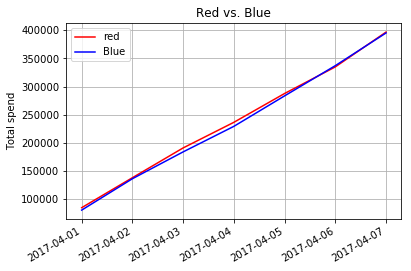

In [223]:
fig,ax = plt.subplots()
ax.plot(red_ts_cum, color="red", label="red")
ax.plot(blue_ts_cum, color="blue", label ="blue")

# some tweaks
#ax.set_ylim(0,100000)
ax.set_title("Red vs. Blue")
ax.set_ylabel("Total spend")
ax.grid(True, which="both")
# change legend
ax.legend().get_texts()[0].set_text("Red")
ax.legend().get_texts()[1].set_text("Blue")
# format date
plt.gcf().autofmt_xdate()